### FIXED AMOUNT - EQUAL STEPS - AVERAGING STRATEGY

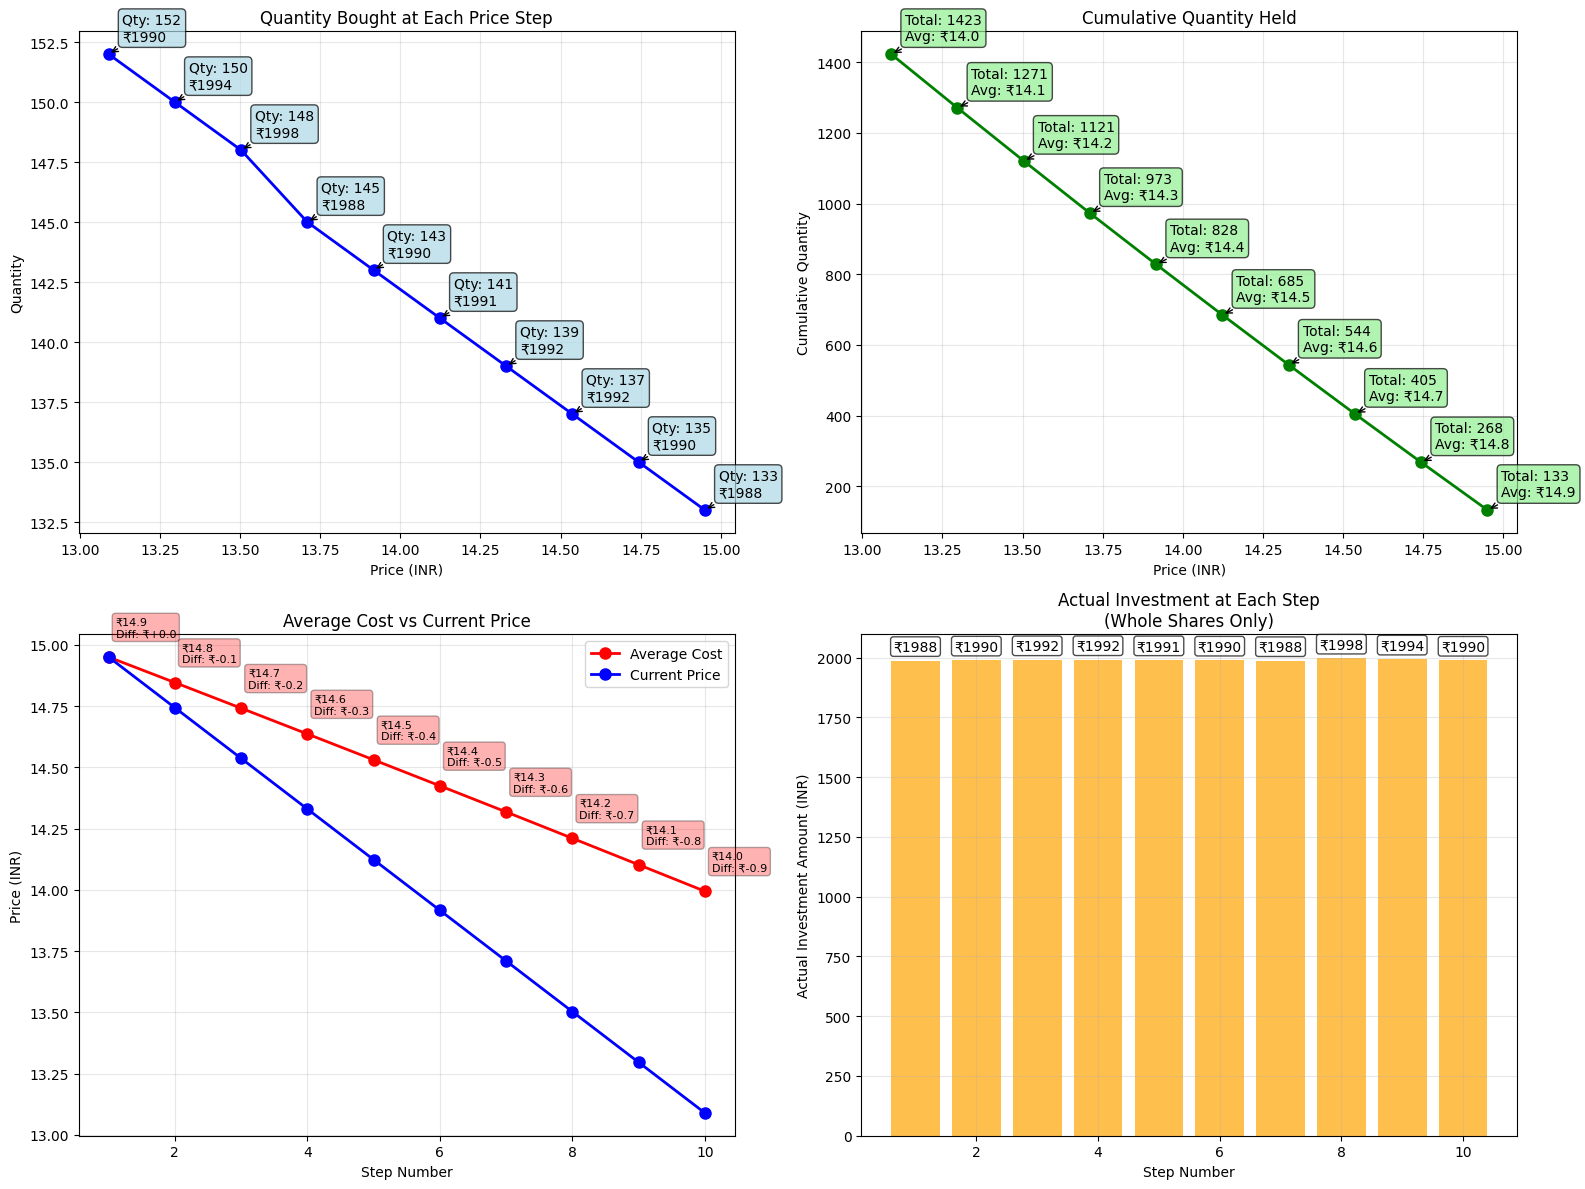

REAL-WORLD DOLLAR-COST AVERAGING INVESTMENT ANALYSIS
Total Planned Investment: ₹20,000
Total Actual Investment: ₹19,914.19
Uninvested Amount: ₹85.81
Number of Steps: 10
Planned per Step: ₹2,000.00
Price Range: ₹14.95 to ₹13.09

DETAILED STEP-BY-STEP BREAKDOWN:
-------------------------------------------------------------------------------------
Step   Price (₹)    Quantity     Investment (₹)  Cumulative Qty  Avg Cost (₹)   
-------------------------------------------------------------------------------------
1      14.95        133          1988.35         133             14.9500        
2      14.74        135          1990.35         268             14.8459        
3      14.54        137          1991.52         405             14.7413        
4      14.33        139          1991.87         544             14.6362        
5      14.12        141          1991.39         685             14.5306        
6      13.92        143          1990.08         828             14.4246        


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
total_investment = 20000  # INR
num_steps = 10
initial_price = 14.95  # INR
final_price = 13.09  # INR

# Price range
prices = np.linspace(initial_price, final_price, num_steps)

# Amount to invest at each step
investment_per_step = total_investment / num_steps

# Calculate quantities (as integers - no fractional shares)
quantities = np.floor(investment_per_step / prices).astype(int)

# Calculate actual amounts spent at each step
actual_investment_per_step = quantities * prices
total_actual_investment = np.sum(actual_investment_per_step)

# Calculate cumulative metrics
cumulative_quantities = np.cumsum(quantities)
cumulative_investment = np.cumsum(actual_investment_per_step)
average_cost_per_share = cumulative_investment / cumulative_quantities

# Create a comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Quantity bought at each price with annotations
ax1.plot(prices, quantities, "bo-", linewidth=2, markersize=8, markerfacecolor="blue")
ax1.set_xlabel("Price (INR)")
ax1.set_ylabel("Quantity")
ax1.set_title("Quantity Bought at Each Price Step")
ax1.grid(True, alpha=0.3)

# Annotate each point with quantity and investment info
for i, (price, qty, inv) in enumerate(
    zip(prices, quantities, actual_investment_per_step)
):
    ax1.annotate(
        f"Qty: {qty}\n₹{inv:.0f}",
        xy=(price, qty),
        xytext=(10, 10),
        textcoords="offset points",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
    )

# Plot 2: Cumulative quantity vs price with annotations
ax2.plot(
    prices,
    cumulative_quantities,
    "go-",
    linewidth=2,
    markersize=8,
    markerfacecolor="green",
)
ax2.set_xlabel("Price (INR)")
ax2.set_ylabel("Cumulative Quantity")
ax2.set_title("Cumulative Quantity Held")
ax2.grid(True, alpha=0.3)

# Annotate cumulative quantities
for i, (price, cum_qty, avg_cost) in enumerate(
    zip(prices, cumulative_quantities, average_cost_per_share)
):
    ax2.annotate(
        f"Total: {cum_qty}\nAvg: ₹{avg_cost:.1f}",
        xy=(price, cum_qty),
        xytext=(10, 10),
        textcoords="offset points",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
    )

# Plot 3: Average cost per share with annotations
ax3.plot(
    range(1, num_steps + 1),
    average_cost_per_share,
    "ro-",
    linewidth=2,
    markersize=8,
    markerfacecolor="red",
    label="Average Cost",
)
ax3.plot(
    range(1, num_steps + 1),
    prices,
    "bo-",
    linewidth=2,
    markersize=8,
    markerfacecolor="blue",
    label="Current Price",
)
ax3.set_xlabel("Step Number")
ax3.set_ylabel("Price (INR)")
ax3.set_title("Average Cost vs Current Price")
ax3.legend()
ax3.grid(True, alpha=0.3)

# Annotate average cost points
for i, (step, avg_cost, price) in enumerate(
    zip(range(1, num_steps + 1), average_cost_per_share, prices)
):
    diff = price - avg_cost
    color = "green" if diff > 0 else "red"
    ax3.annotate(
        f"₹{avg_cost:.1f}\nDiff: ₹{diff:+.1f}",
        xy=(step, avg_cost),
        xytext=(5, 15),
        textcoords="offset points",
        bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.3),
        fontsize=8,
    )

# Plot 4: Actual investment distribution
ax4.bar(range(1, num_steps + 1), actual_investment_per_step, color="orange", alpha=0.7)
ax4.set_xlabel("Step Number")
ax4.set_ylabel("Actual Investment Amount (INR)")
ax4.set_title("Actual Investment at Each Step\n(Whole Shares Only)")
ax4.grid(True, alpha=0.3)

# Annotate bars with investment amounts
for i, (step, inv) in enumerate(
    zip(range(1, num_steps + 1), actual_investment_per_step)
):
    ax4.annotate(
        f"₹{inv:.0f}",
        xy=(step, inv),
        xytext=(0, 5),
        textcoords="offset points",
        ha="center",
        va="bottom",
        bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7),
    )

plt.tight_layout()
plt.show()

# Print detailed results
print("=" * 70)
print("REAL-WORLD DOLLAR-COST AVERAGING INVESTMENT ANALYSIS")
print("=" * 70)
print(f"Total Planned Investment: ₹{total_investment:,}")
print(f"Total Actual Investment: ₹{total_actual_investment:,.2f}")
print(f"Uninvested Amount: ₹{total_investment - total_actual_investment:,.2f}")
print(f"Number of Steps: {num_steps}")
print(f"Planned per Step: ₹{investment_per_step:,.2f}")
print(f"Price Range: ₹{initial_price:.2f} to ₹{final_price:.2f}")
print()

print("DETAILED STEP-BY-STEP BREAKDOWN:")
print("-" * 85)
print(
    f"{'Step':<6} {'Price (₹)':<12} {'Quantity':<12} {'Investment (₹)':<15} {'Cumulative Qty':<15} {'Avg Cost (₹)':<15}"
)
print("-" * 85)

for i in range(num_steps):
    print(
        f"{i+1:<6} {prices[i]:<12.2f} {quantities[i]:<12} {actual_investment_per_step[i]:<15.2f} {cumulative_quantities[i]:<15} {average_cost_per_share[i]:<15.4f}"
    )

print("-" * 85)

# Final results
total_quantity = np.sum(quantities)
final_average_cost = total_actual_investment / total_quantity
final_value = total_quantity * final_price
profit_loss = final_value - total_actual_investment
profit_loss_percentage = (profit_loss / total_actual_investment) * 100
uninvested_amount = total_investment - total_actual_investment

print("\nFINAL RESULTS:")
print("-" * 50)
print(f"Total Quantity Acquired: {total_quantity} shares")
print(f"Total Amount Invested: ₹{total_actual_investment:,.2f}")
print(f"Uninvested Cash: ₹{uninvested_amount:,.2f}")
print(f"Average Cost per Share: ₹{final_average_cost:.4f}")
print(f"Final Share Price: ₹{final_price:.2f}")
print(f"Final Portfolio Value: ₹{final_value:,.2f}")
print(f"Profit/Loss: ₹{profit_loss:,.2f} ({profit_loss_percentage:+.2f}%)")
print("-" * 50)

# Additional insights
print("\nADDITIONAL INSIGHTS:")
print("-" * 50)
if final_average_cost < final_price:
    status = "PROFITABLE"
    symbol = "✓"
else:
    status = "AT A LOSS"
    symbol = "✗"

print(f"{symbol} Strategy is currently {status}")
print(
    f"{symbol} Average cost: ₹{final_average_cost:.2f} vs Current price: ₹{final_price:.2f}"
)

price_change = ((final_price - initial_price) / initial_price) * 100
investment_efficiency = (total_actual_investment / total_investment) * 100

print(f"✓ Overall price change: {price_change:+.2f}%")
print(f"✓ Investment efficiency: {investment_efficiency:.1f}% of planned amount")
print(f"✓ Cash remaining for future investments: ₹{uninvested_amount:,.2f}")
print("-" * 50)

# Show the benefit of DCA
single_investment_quantity = total_investment // initial_price
single_investment_cost = single_investment_quantity * initial_price
single_investment_value = single_investment_quantity * final_price
single_investment_pl = single_investment_value - single_investment_cost
single_investment_pl_pct = (single_investment_pl / single_investment_cost) * 100

print("\nCOMPARISON: DCA vs LUMP SUM INVESTMENT")
print("-" * 50)
print(f"Lump Sum Investment (at ₹{initial_price:.2f}):")
print(f"  • Quantity: {single_investment_quantity} shares")
print(f"  • Investment: ₹{single_investment_cost:,.2f}")
print(f"  • Current Value: ₹{single_investment_value:,.2f}")
print(f"  • P&L: ₹{single_investment_pl:,.2f} ({single_investment_pl_pct:+.2f}%)")
print()
print(f"Dollar Cost Averaging:")
print(f"  • Quantity: {total_quantity} shares")
print(f"  • Investment: ₹{total_actual_investment:,.2f}")
print(f"  • Current Value: ₹{final_value:,.2f}")
print(f"  • P&L: ₹{profit_loss:,.2f} ({profit_loss_percentage:+.2f}%)")
print("-" * 50)